# Prediction of Credit Payment Default Payment Status: Feature Selection

In this step, we will be looking at the features correlation to check if there are any highly correlated features to be removed.

####  Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset into Jupyter Notebook

In [3]:
credit_card = pd.read_csv('\Credit_Card_Preprocessed.csv')

# drop the column "Unnamed = 0"
credit_card = credit_card.drop(['Unnamed: 0'], axis=1)

credit_card

,GENDER,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,0.012658,2,1,24,2,2,-1,-1,0,...,0.122080,0.135370,0.221071,0.000000,0.005698,0.000000,0.000000,0.000000,0.000000,1
1,2,0.139241,2,2,26,-1,2,0,0,0,...,0.129971,0.144193,0.228690,0.000000,0.008269,0.010753,0.012048,0.000000,0.021277,1
2,2,0.101266,2,2,34,0,0,0,0,0,...,0.156644,0.173544,0.257398,0.017250,0.012404,0.010753,0.012048,0.012341,0.053191,0
3,2,0.050633,2,1,37,0,0,0,0,0,...,0.190369,0.209325,0.290102,0.022728,0.016696,0.012903,0.013253,0.013192,0.010638,0
4,1,0.050633,2,1,57,-1,0,-1,0,0,...,0.172584,0.184265,0.265767,0.022728,0.303332,0.107527,0.108434,0.008503,0.007223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28662,1,0.265823,3,1,39,0,0,0,0,0,...,0.334334,0.215143,0.258405,0.096593,0.165389,0.053796,0.036711,0.061704,0.010638,0
28663,1,0.177215,3,2,43,-1,-1,-1,-1,0,...,0.143736,0.148624,0.221071,0.020875,0.029158,0.096753,0.001554,0.000000,0.000000,0
28664,1,0.025316,2,2,37,4,3,2,-1,0,...,0.172435,0.187932,0.266295,0.000000,0.000000,0.236559,0.050602,0.024682,0.032979,1
28665,1,0.088608,3,1,41,1,-1,0,0,0,...,0.249364,0.165645,0.335419,0.976159,0.028191,0.012667,0.023205,0.653618,0.019191,1


In [6]:
credit_card.columns 

Index(['GENDER', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Plot feature correlation heatmap to identify highly correlated features 

[Text(0.5, 0, 'GENDER'),
 Text(1.5, 0, 'LIMIT_BAL'),
 Text(2.5, 0, 'EDUCATION'),
 Text(3.5, 0, 'MARRIAGE'),
 Text(4.5, 0, 'AGE'),
 Text(5.5, 0, 'PAY_1'),
 Text(6.5, 0, 'PAY_2'),
 Text(7.5, 0, 'PAY_3'),
 Text(8.5, 0, 'PAY_4'),
 Text(9.5, 0, 'PAY_5'),
 Text(10.5, 0, 'PAY_6'),
 Text(11.5, 0, 'BILL_AMT1'),
 Text(12.5, 0, 'BILL_AMT2'),
 Text(13.5, 0, 'BILL_AMT3'),
 Text(14.5, 0, 'BILL_AMT4'),
 Text(15.5, 0, 'BILL_AMT5'),
 Text(16.5, 0, 'BILL_AMT6'),
 Text(17.5, 0, 'PAY_AMT1'),
 Text(18.5, 0, 'PAY_AMT2'),
 Text(19.5, 0, 'PAY_AMT3'),
 Text(20.5, 0, 'PAY_AMT4'),
 Text(21.5, 0, 'PAY_AMT5'),
 Text(22.5, 0, 'PAY_AMT6'),
 Text(23.5, 0, 'default payment next month')]

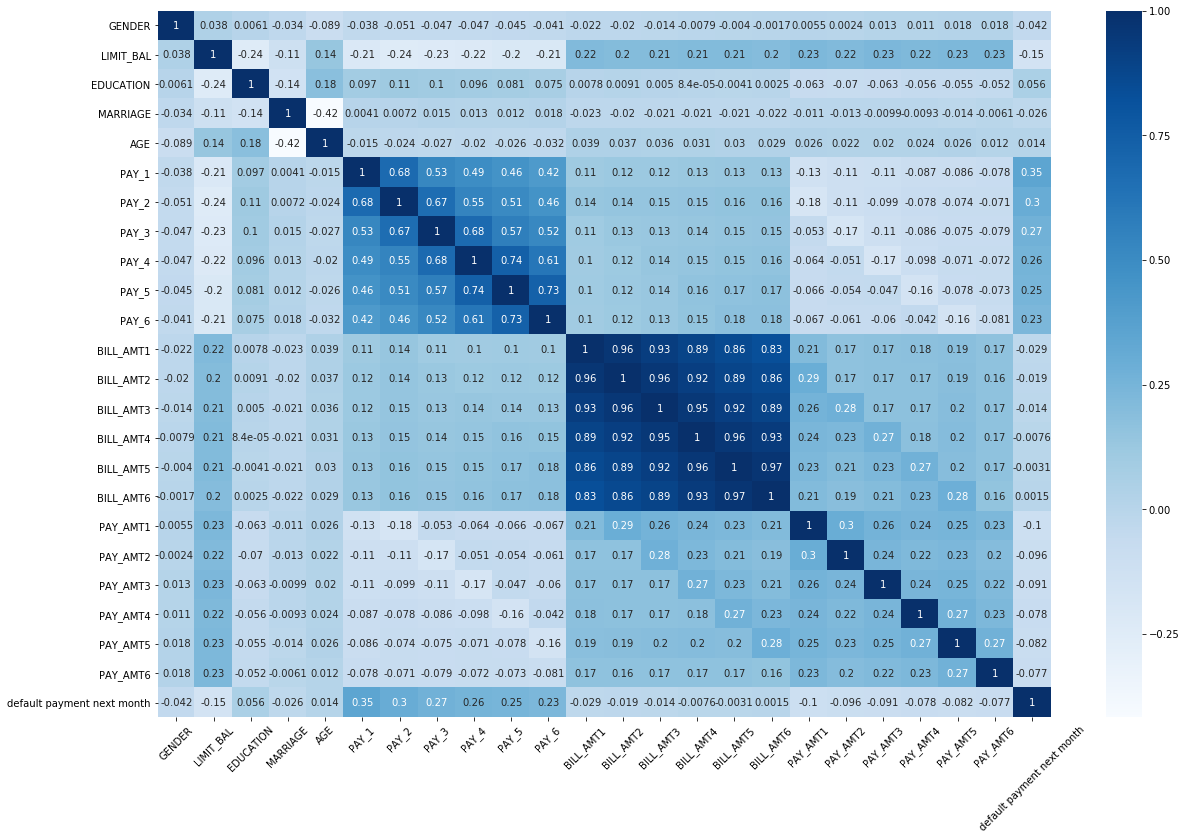

In [4]:
#get correlations of each features in dataset
corrmat = credit_card.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,13))
plt.tight_layout()

#plot heat map
g=sns.heatmap(credit_card[top_corr_features].corr(),annot=True, cmap="Blues")
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [5]:
# save the figure for use in ppt 
g.figure.savefig("feature_correlation.png")

<div class = "alert alert-info"> 
BILL_AMTX has strong correlation with one another. Hence, we decided to only retain one bill amount and drop the remaining bill amounts.
</div>

[Text(0.5, 0, 'BILL_AMT1'),
 Text(1.5, 0, 'BILL_AMT2'),
 Text(2.5, 0, 'BILL_AMT3'),
 Text(3.5, 0, 'BILL_AMT4'),
 Text(4.5, 0, 'BILL_AMT5'),
 Text(5.5, 0, 'BILL_AMT6')]

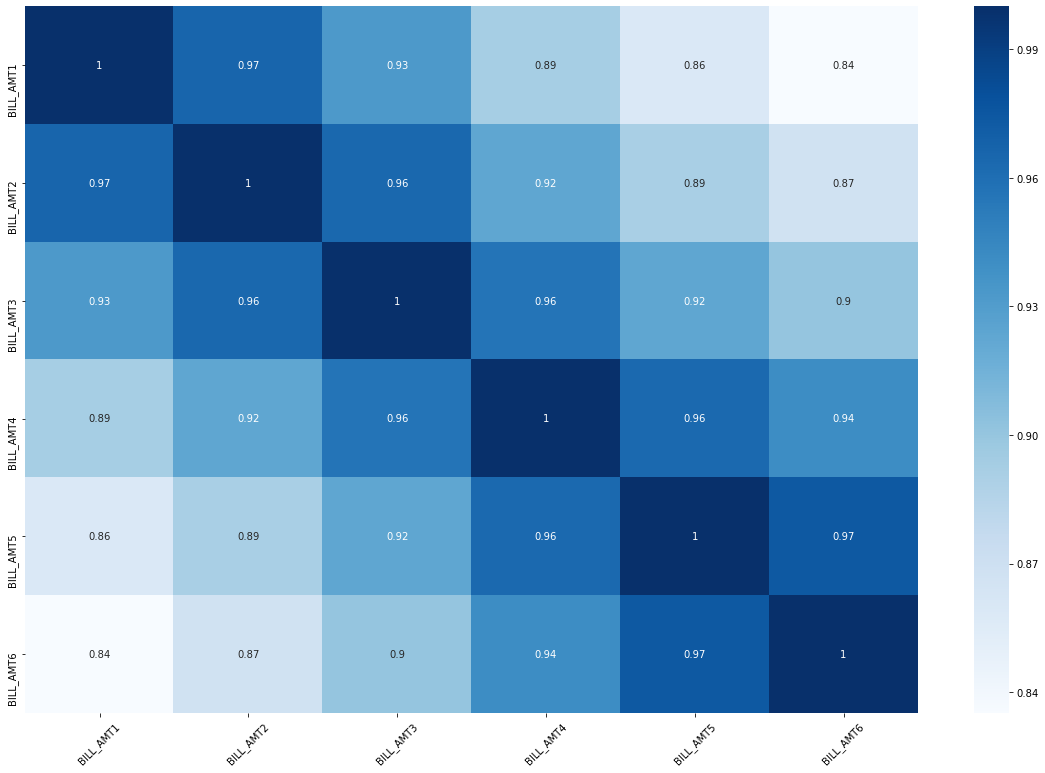

In [9]:
credit_card_bill_payment = credit_card.iloc[:,11:17] # BILL_AMTX columns

#get correlations of each features in dataset
corrmat = credit_card_bill_payment.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,13))

#plot heat map
g=sns.heatmap(credit_card[top_corr_features].corr(),annot=True, cmap="Blues")
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [10]:
data = {'Average Correlation Values': [0.898, 0.922, 0.934, 0.934, 0.92, 0.904],
        'BILL_AMTX': ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']}

average_correlation_others = pd.DataFrame(data) 
average_correlation_others.set_index('BILL_AMTX')

,Average Correlation Values
BILL_AMTX,
BILL_AMT1,0.898
BILL_AMT2,0.922
BILL_AMT3,0.934
BILL_AMT4,0.934
BILL_AMT5,0.920
BILL_AMT6,0.904


The avarage of the correlation values with the others is tabulated (i.e. Average Correlation Values for BILL_AMT1 = (sum of correlation values with BILL_AMT 2-6) / 5).

<div class = "alert alert-info"> 
As shown in the table above, BILL_AMT3 and 4 has the highest average correlation values. Assuming that having the highest correlation values with the rest of the BILL_AMT means that BILL_AMT3 and 4 is the most representative of the BILL_AMT as a whole, we chose to retain (one of the 2 columns) BILL_AMT4 and dropped the remaining BILL_AMT columns.
</div>

Removal of these redundant information will help to improve accuracy during modelling in later stages.

In [7]:
# save the figure for use in ppt 
g.figure.savefig("BILL_AMT_correlation.png")

### Removal of the remaining BILL_AMT features (other then BILL_AMT4)

In [8]:
credit_card = credit_card.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT6'],axis=1)
credit_card

,GENDER,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,0.012658,2,1,24,2,2,-1,-1,0,0,0.122080,0.000000,0.005698,0.000000,0.000000,0.000000,0.000000,1
1,2,0.139241,2,2,26,-1,2,0,0,0,2,0.129971,0.000000,0.008269,0.010753,0.012048,0.000000,0.021277,1
2,2,0.101266,2,2,34,0,0,0,0,0,0,0.156644,0.017250,0.012404,0.010753,0.012048,0.012341,0.053191,0
3,2,0.050633,2,1,37,0,0,0,0,0,0,0.190369,0.022728,0.016696,0.012903,0.013253,0.013192,0.010638,0
4,1,0.050633,2,1,57,-1,0,-1,0,0,0,0.172584,0.022728,0.303332,0.107527,0.108434,0.008503,0.007223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28662,1,0.265823,3,1,39,0,0,0,0,0,0,0.334334,0.096593,0.165389,0.053796,0.036711,0.061704,0.010638,0
28663,1,0.177215,3,2,43,-1,-1,-1,-1,0,0,0.143736,0.020875,0.029158,0.096753,0.001554,0.000000,0.000000,0
28664,1,0.025316,2,2,37,4,3,2,-1,0,0,0.172435,0.000000,0.000000,0.236559,0.050602,0.024682,0.032979,1
28665,1,0.088608,3,1,41,1,-1,0,0,0,-1,0.249364,0.976159,0.028191,0.012667,0.023205,0.653618,0.019191,1


### Export dataframe to csv.

In [9]:
credit_card.to_csv(r'\Credit_Card_afterFeatureSelection.csv')